In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import neighbors

from sklearn import metrics as ms

# Data analysis

In [10]:
#Source of "data.csv" (some modifications have been already performed)
# https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset

df = pd.read_csv("data.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,120,72,22,56,20.8,48,0
1,71,62,0,0,21.8,26,0
2,74,70,40,49,35.3,39,0
3,88,78,30,0,27.6,37,0
4,115,98,0,0,24.0,34,0


In [11]:
#Check for "null" (NaN) values
df.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Age,0
Outcome,0


In [12]:
#Getting more details about the data
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,119.983766,69.503247,20.694805,77.724026,31.865909,33.730519,0.301948
std,31.186260,19.555067,16.298250,106.528025,7.427594,12.208374,0.459850
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,97.750000,62.000000,0.000000,0.000000,27.400000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,17.000000,32.000000,29.000000,0.000000
75%,136.000000,80.000000,32.000000,127.750000,36.425000,42.000000,1.000000
max,199.000000,114.000000,99.000000,600.000000,57.300000,70.000000,1.000000


# Data visualization

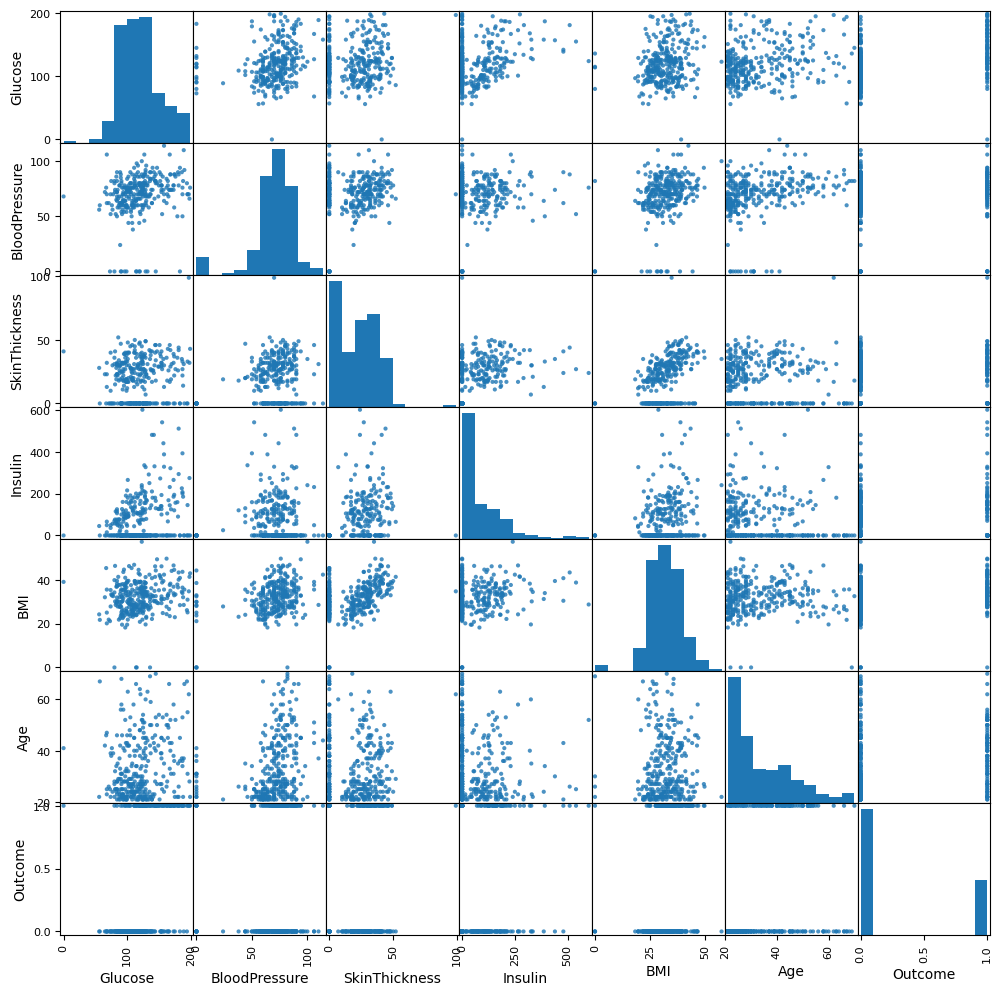

In [16]:
_ = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(12,12))

# K-nearest neighbors

In [17]:
#Choose features and label
features = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'Age']
label = 'Outcome'
feat_data = df[features].copy()
label_data = df[label].copy()
feat_data.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,120,72,22,56,20.8,48
1,71,62,0,0,21.8,26
2,74,70,40,49,35.3,39
3,88,78,30,0,27.6,37
4,115,98,0,0,24.0,34


In [18]:
#Separate the values into testing and training samples

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(246, 6)
(62, 6)


In [28]:
# Creation of K-Neighbors Classifier

n_neighbors = 5 # Recommended by documentation

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)
clf

KNeighborsClassifier()

In [26]:
prediction = clf.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [33]:
# Sklearn's implementation for accuracy

print ("Accuracy:", ms.accuracy_score(y_test.values, prediction), '\n')

Accuracy: 0.6935483870967742 

